In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical

C:\Users\shrey\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shrey\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shrey\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shrey\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
import tensorflow.keras.backend as K

In [3]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

In [5]:
dirtrain='D:\\grape_leaves_DB\\train'

In [6]:
dirtest='D:\\grape_leaves_DB\\test'

In [7]:
categories=["Black_rot","Esca_(Black_Measles)","Healthy","Leaf_blight_(Isariopsis_Leaf_Spot)"]

(256, 256, 3)


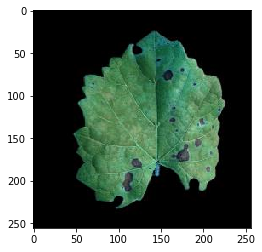

In [8]:
for c in categories:
    path=os.path.join(dirtrain,c)
    for i in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,i))
        print(img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [9]:
training_data = []
def create_training_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_train=create_training_data()

In [10]:
testing_data = []
def create_testing_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtest,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                testing_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_test=create_testing_data()

In [11]:
print(len(training_data))
print(count_train)
print(len(testing_data))
print(count_test)

3189
[966, 1144, 213, 866]
870
[210, 240, 210, 210]


In [12]:
random.shuffle(training_data)
random.shuffle(testing_data)

for s in training_data:
    print(s[1])

In [13]:
x_train = []
y_train = []
x_test = []
y_test = []

In [14]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
'''for features,label in testing_data:
    x_train.append(features)
    y_train.append(label)'''
x_train=np.array(x_train).reshape(-1,256,256,3)

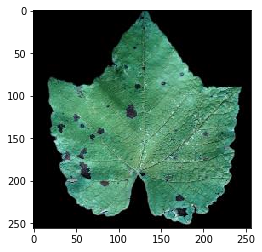

In [15]:
x=cv2.resize(training_data[0][0],(256,256))
plt.imshow(x,cmap='gray')

In [16]:
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,256,256,3)

In [17]:
def save_training_data(x_train,y_train):
    pickle_out=open("x_train_coloured.pickle","wb")
    pickle.dump(x_train,pickle_out)
    pickle_out.close()

    pickle_out=open("y_train_coloured.pickle","wb")
    pickle.dump(y_train,pickle_out)
    pickle_out.close
save_training_data(x_train,y_train)

In [18]:
def save_testing_data(x_test,y_test):
    pickle_out=open("x_test_coloured.pickle","wb")
    pickle.dump(x_test,pickle_out)
    pickle_out.close()

    pickle_out=open("y_test_coloured.pickle","wb")
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
save_testing_data(x_test,y_test)

In [19]:
def load_data():
    pickle_in=open("x_train_coloured.pickle","rb")
    x_train=pickle.load(pickle_in)
    return x_train

In [20]:
x_train.shape

(3189, 256, 256, 3)

In [21]:
K.clear_session()
model=Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))


model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(Activation('relu'))

model.add(Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
activation (Activation)      (None, 3, 3, 32)          0

In [23]:
y_train_cat=to_categorical(y_train,4)

In [24]:
y_test_cat=to_categorical(y_test,4)

In [25]:
model.fit(x_train,y_train_cat,batch_size=32,
          epochs=10,verbose=1,validation_split=0.15,shuffle=True)

Train on 2710 samples, validate on 479 samples
Epoch 1/10
2710/2710 [==============================] - 22s 8ms/sample - loss: 3.4997 - acc: 0.4974 - val_loss: 0.7321 - val_acc: 0.7015
Epoch 2/10
2710/2710 [==============================] - 18s 7ms/sample - loss: 0.7215 - acc: 0.7037 - val_loss: 0.4440 - val_acc: 0.8079
Epoch 3/10
2710/2710 [==============================] - 18s 7ms/sample - loss: 0.4942 - acc: 0.8280 - val_loss: 1.1187 - val_acc: 0.6409
Epoch 4/10
2710/2710 [==============================] - 18s 7ms/sample - loss: 0.3027 - acc: 0.8897 - val_loss: 0.2032 - val_acc: 0.9144
Epoch 5/10
2710/2710 [==============================] - 18s 7ms/sample - loss: 0.2363 - acc: 0.9199 - val_loss: 0.1205 - val_acc: 0.9582
Epoch 6/10
2710/2710 [==============================] - 18s 7ms/sample - loss: 0.1758 - acc: 0.9435 - val_loss: 0.1151 - val_acc: 0.9666
Epoch 7/10
2710/2710 [==============================] - 18s 7ms/sample - loss: 0.1529 - acc: 0.9557 - val_loss: 0.1024 - val_acc: 0

import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

In [26]:
model.save("leaf_disease_coloured.h5")

In [27]:
new_model=tf.keras.models.load_model("leaf_disease_coloured.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [28]:
loss, acc = new_model.evaluate(x_test,y_test_cat, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

870/870 - 2s - loss: 0.1240 - acc: 0.9667
Restored model, accuracy: 96.67%


In [29]:
'''from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())'''

'from tensorflow.python.client import device_lib\nprint(device_lib.list_local_devices())'

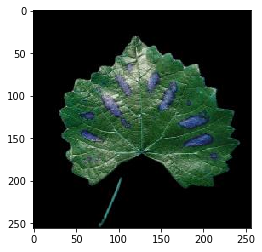

In [30]:
d='D:\\grape_leaves_DB\\0ad02171-f9d0-4d0f-bdbd-36ac7674fafc___FAM_B.Msls 4356_final_masked.jpg'
img=cv2.imread(d)
plt.imshow(img)

In [31]:
img=img.reshape(-1,256,256,3)

In [32]:
predict_class=new_model.predict_classes(img)

In [33]:
predict_class

array([1], dtype=int64)

In [34]:
categories[predict_class[0]]

'Esca_(Black_Measles)'